# 🩺 Heart Disease Prediction using Machine Learning
Heart Disease Data Set from UCI data repository

<img src="https://images.pexels.com/photos/887349/pexels-photo-887349.jpeg?cs=srgb&dl=pexels-designecologist-887349.jpg&fm=jpg" alt="Heart Disease" width="1280" height="600"/>

---

### 👨‍💻 Author: **Abdul Samad**

- 🔗 **LinkedIn:** [abdulsamad577](https://www.linkedin.com/in/abdulsamad577/)  
- 🧠 **Kaggle:** [samad0015](https://www.kaggle.com/samad0015)     
- 📅 **Date:** 20 May 2025

---


# 📘 Table of Contents

| No. | Section Title                     | Description                                           |
|-----|----------------------------------|-------------------------------------------------------|
| 1   | [**Introduction**](#1-Introduction)                | Overview of the project and its background           |
| 2   | [**Problem Statement**](#2.-Problem-Statement)      | Defining the core issue to be solved                 |
| 3   | [**Dataset Description**](#3.-Dataset-Description)  | Summary of dataset features and sources              |
| 4   | [**Exploratory Data Analysis**](#4.-Exploratory-Data-Analysis-(EDA)) | Visual/statistical techniques to explore patterns   |
| 5   | [**Data Preprocessing**](#5.-Data-Preprocessing)    | Cleaning and preparing data for modeling             |
| 6   | [**Model Building**](#6.-Model-Building)            | Creating ML models for heart disease prediction      |
| 7   | [**Model Evaluation**](#7.-Model-Evaluation)        | Measuring model performance with metrics             |
| 8   | [**Hyperparameter Tuning**](#8.-Hyperparameter-Tuning) | Improving performance through optimization         |
| 9   | [**Feature Importance Analysis**](#9.-Feature-Importance-Analysis) | Identifying impactful features               |
| 10  | [**Conclusion**](#10.-Conclusion) | Key findings and suggestions             |



# 1. Introduction

## 📚 Context

This is a **multivariate** dataset, which means it includes multiple statistical variables for analysis. It is widely used in **numerical data analysis** and **machine learning** tasks.

- The dataset consists of **14 key attributes**, such as:
  - Age
  - Sex
  - Chest pain type
  - Resting blood pressure
  - Serum cholesterol
  - Fasting blood sugar
  - Resting electrocardiographic results
  - Maximum heart rate achieved
  - Exercise-induced angina
  - ST depression (oldpeak)
  - Slope of the peak exercise ST segment
  - Number of major vessels
  - Thalassemia
  - Target (Heart disease presence)

Although the full database contains **76 attributes**, research and ML applications commonly use a **subset of 14**.

The **Cleveland Clinic dataset** is the most frequently used version for heart disease prediction. The primary goal is to:
- Predict whether a patient has **heart disease** based on the given attributes.
- Perform exploratory data analysis to discover **clinical insights** and understand the **underlying patterns** in heart-related conditions.

---

## 🧾 Column Descriptions

| Column      | Description |
|-------------|-------------|
| `id`        | Unique ID for each patient |
| `age`       | Age of the patient (in years) |
| `origin`    | Origin or place of study |
| `sex`       | Gender (Male/Female) |
| `cp`        | Chest pain type: <br> `[typical angina, atypical angina, non-anginal, asymptomatic]` |
| `trestbps`  | Resting blood pressure (in mm Hg on hospital admission) |
| `chol`      | Serum cholesterol (in mg/dl) |
| `fbs`       | Fasting blood sugar > 120 mg/dl (True/False) |
| `restecg`   | Resting electrocardiographic results: <br> `[normal, ST-T wave abnormality, left ventricular hypertrophy]` |
| `thalach`   | Maximum heart rate achieved |
| `exang`     | Exercise-induced angina (True/False) |
| `oldpeak`   | ST depression induced by exercise relative to rest |
| `slope`     | Slope of the peak exercise ST segment |
| `ca`        | Number of major vessels (0–3) colored by fluoroscopy |
| `thal`      | Thalassemia: `[normal, fixed defect, reversible defect]` |
| `num`       | Target: presence of heart disease |

---



# 2. Problem Statement

This is framed as a **binary classification** problem.

**Goal:** Predict whether a patient has **heart disease** based on their medical attributes from the UCI Heart Disease dataset.

'Num' is a predicted attribute that states there are 5 types of heart diseases, in my opinion.

0 = no heart disease

1 = mild heart disease`

2 = moderate heart disease

3 = severe heart disease

4 = critical heart disease



>### Import Libraries


In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer,SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,mean_squared_error
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")


# 3. Dataset Description

> Load the Data

In [3]:
df=pd.read_csv("heart_disease_uci.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.shape

(920, 16)

> There are 920 patients in the dataset, and each patient has 16 attributes. The target variable is 'num', which indicates the presence of heart disease.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [6]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [7]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
trestbps     6.413043
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
num          0.000000
dtype: float64

# 4. Exploratory Data Analysis (EDA)

>### *Age* Column

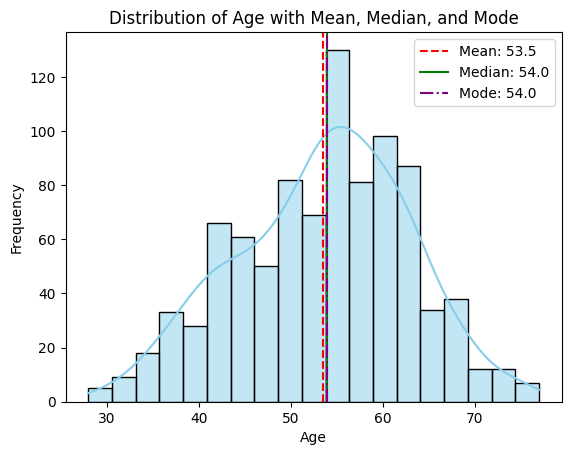

In [8]:
sns.histplot(df['age'], kde=True, color='skyblue')

# Calculate mean, median, mode
mean_val = df['age'].mean()
median_val = df['age'].median()
mode_val = df['age'].mode()[0]  # mode() returns a Series

# Plot vertical lines
plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}')
plt.axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.1f}')
plt.axvline(mode_val, color='purple', linestyle='-.', label=f'Mode: {mode_val:.1f}')

# Add legend and title
plt.legend()
plt.title('Distribution of Age with Mean, Median, and Mode')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [9]:
print("Mean Age:", mean_val)
print("Median Age:", median_val)
print("Mode Age:", mode_val)

Mean Age: 53.51086956521739
Median Age: 54.0
Mode Age: 54


>### *Sex* Column


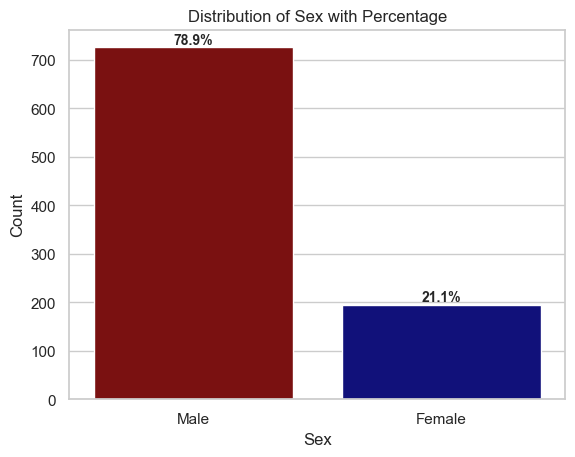

In [10]:
# Calculate value counts and percentages
sex_counts = df['sex'].value_counts()
percentages = (sex_counts / sex_counts.sum()) * 100

# Create the bar plot
sns.set(style="whitegrid")
ax = sns.barplot(x=sex_counts.index, y=sex_counts.values, palette=['#8B0000', '#00008B'])

# Set axis labels and title
plt.title('Distribution of Sex with Percentage')
plt.xlabel('Sex')
plt.ylabel('Count')

# Annotate percentage labels on top of each bar
for i, (count, pct) in enumerate(zip(sex_counts.values, percentages)):
    plt.text(i, count + 1, f'{pct:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()


>### *dataset* Column

In [11]:
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

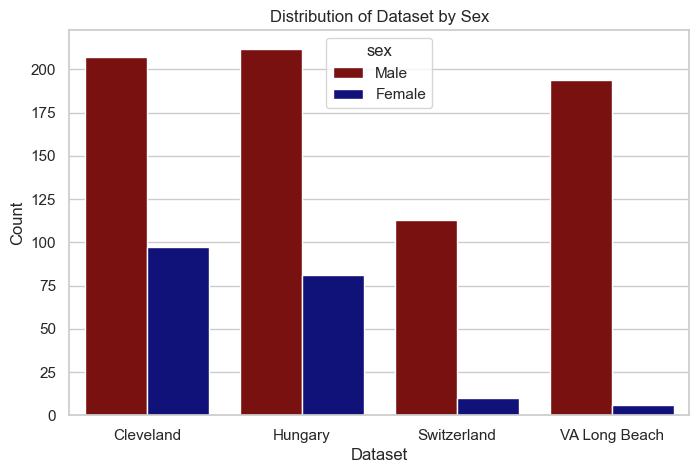

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count of each 'dataset' grouped by 'sex'
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='dataset', hue='sex', palette=['#8B0000', '#00008B'])

# Labels and title
plt.title('Distribution of Dataset by Sex')
plt.xlabel('Dataset')
plt.ylabel('Count')
plt.show()


>### *cp* Column

In [13]:
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

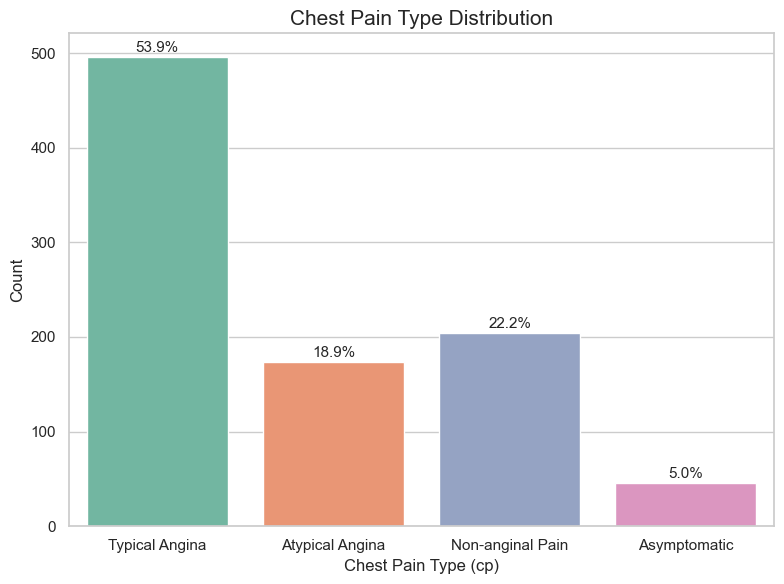

In [14]:
cp_counts = df['cp'].value_counts().sort_index()
cp_percent = (cp_counts / cp_counts.sum()) * 100  # Calculate percentages

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x=cp_counts.index, y=cp_counts.values, palette='Set2')

# Labels and title
plt.xlabel('Chest Pain Type (cp)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Chest Pain Type Distribution', fontsize=15)
plt.xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])

# Add percentage labels
for i, (count, percent) in enumerate(zip(cp_counts.values, cp_percent.values)):
    plt.text(i, count + 5, f'{percent:.1f}%', ha='center', fontsize=11)

plt.tight_layout()
plt.show()


>### *trestbps* Column

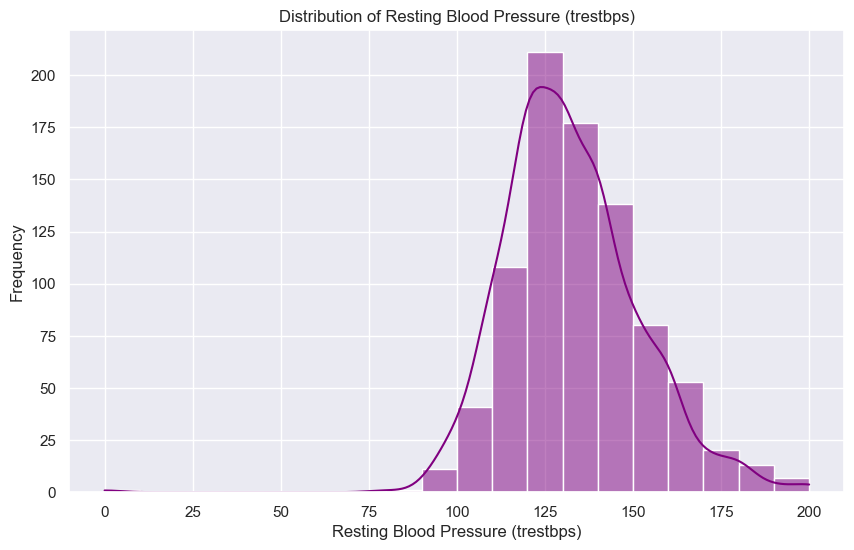

In [15]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['trestbps'], bins=20, color='purple', kde=True)
plt.title('Distribution of Resting Blood Pressure (trestbps)')
plt.xlabel('Resting Blood Pressure (trestbps)')
plt.ylabel('Frequency')
plt.show()

In [16]:
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [17]:
df[df['trestbps'] ==0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
753,754,55,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,NaN,NaN,3


>This value is an outlier in the column, as a blood pressure reading of 0 is not physiologically possible. So we will replace it with non value.

In [18]:
# df=df[df['trestbps'] != 0]
df.loc[df['trestbps'] == 0, 'trestbps'] = np.nan

>### *Chol* Column

<Axes: xlabel='chol', ylabel='Count'>

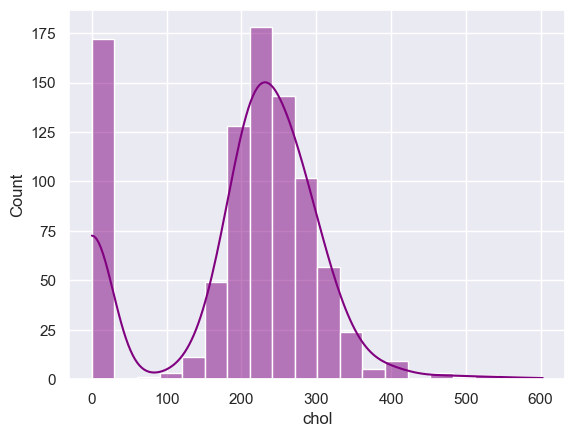

In [19]:
sns.histplot(df['chol'], bins=20, color='purple', kde=True)

In [20]:
df['chol'].describe()

count    890.000000
mean     199.130337
std      110.780810
min        0.000000
25%      175.000000
50%      223.000000
75%      268.000000
max      603.000000
Name: chol, dtype: float64

In [21]:
df[df['chol']==0].shape

(172, 16)

> These values are outliers in the column, as a cholesterol reading of 0 is not physiologically possible. So we will replace it with empty values.

In [22]:
# df=df[df['chol'] != 0]
df.loc[df['chol'] == 0, 'chol'] = np.nan

### *thalch* Column

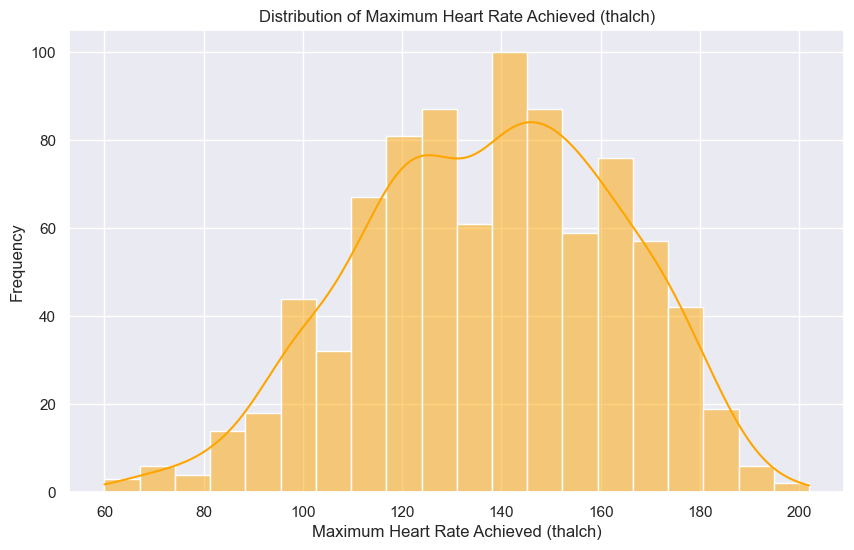

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['thalch'],color='orange', bins=20, kde=True)
plt.title('Distribution of Maximum Heart Rate Achieved (thalch)')
plt.xlabel('Maximum Heart Rate Achieved (thalch)')
plt.ylabel('Frequency')
plt.show()


>### *oldpeak* Column

<Axes: xlabel='oldpeak', ylabel='Count'>

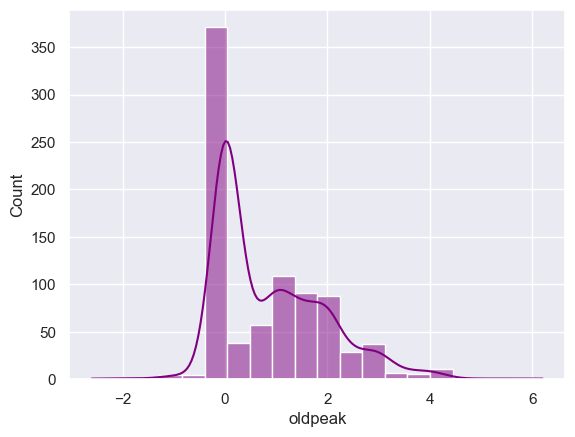

In [24]:
sns.histplot(df['oldpeak'], color='purple', bins=20, kde=True)

In [25]:
df['oldpeak'].describe()

count    858.000000
mean       0.878788
std        1.091226
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

>### *slope* Column

In [26]:
df['slope'].value_counts()

slope
flat           345
upsloping      203
downsloping     63
Name: count, dtype: int64

>### *ca* Column

<Axes: xlabel='ca', ylabel='Count'>

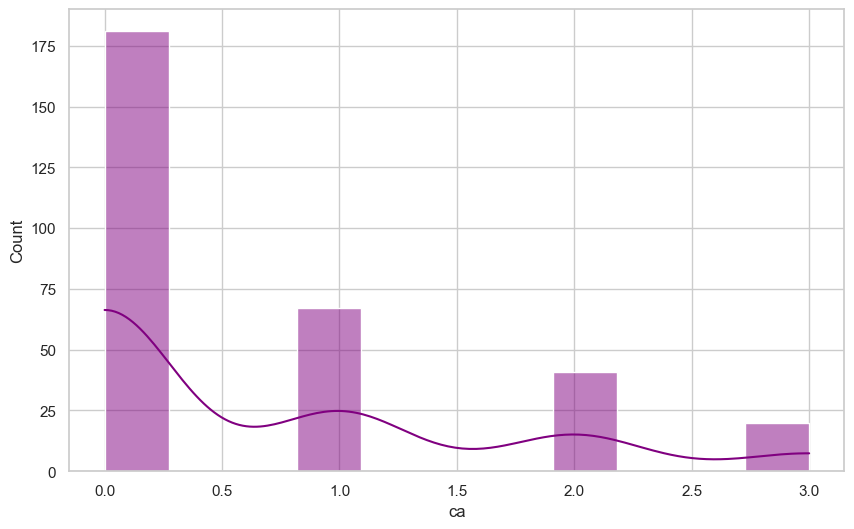

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['ca'], color='purple', kde=True)

In [28]:
df['ca'].describe()

count    309.000000
mean       0.676375
std        0.935653
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: ca, dtype: float64

>### *thal* Column

In [29]:
df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

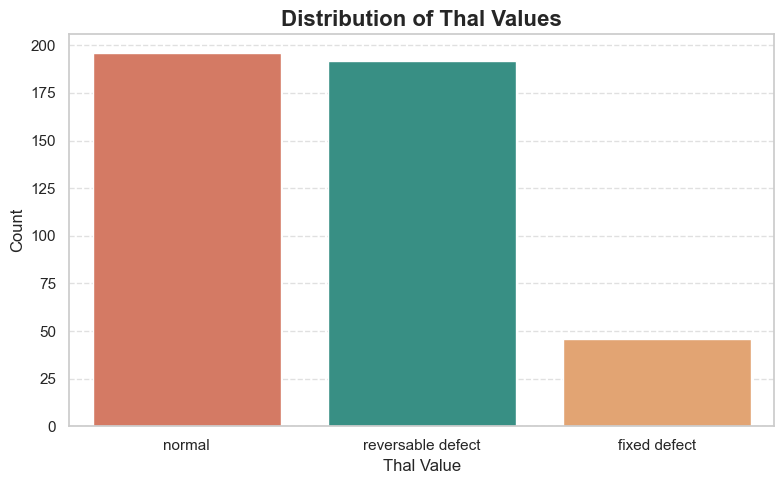

In [30]:
# Prepare the data
thal_counts = df['thal'].value_counts().reset_index()
thal_counts.columns = ['Thal Value', 'Count']

# Custom colors (make sure there are enough colors for all unique values)
colors = ['#e76f51', '#2a9d8f', '#f4a261', '#264653']

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(
    x='Thal Value',
    y='Count',
    data=thal_counts,
    palette=colors[:len(thal_counts)]  # Use only as many colors as needed
)

plt.title('Distribution of Thal Values', fontsize=16, weight='bold')
plt.xlabel('Thal Value', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

>### *num* Column

In [31]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

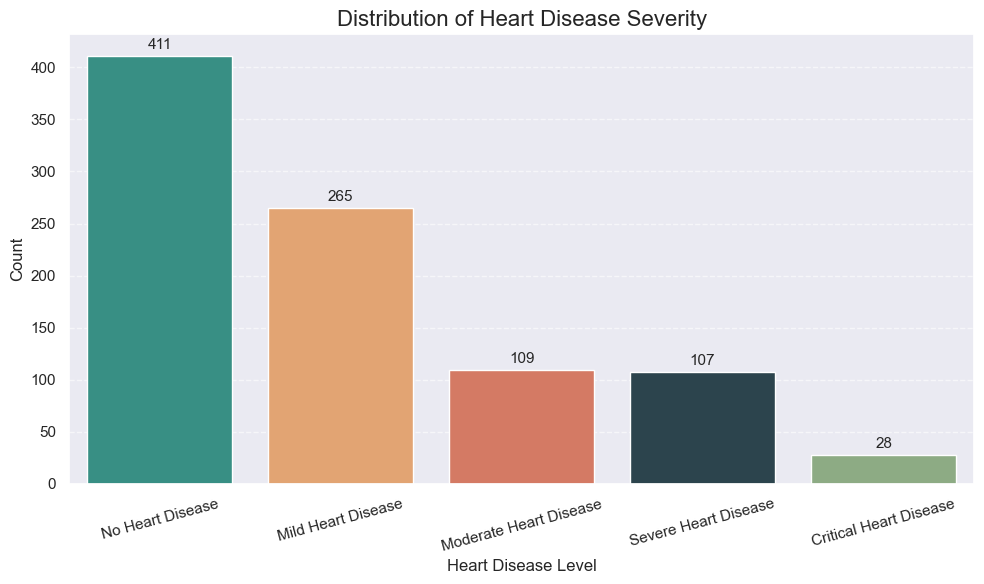

In [32]:
sns.set(style="darkgrid")

# Mapping dictionary (heart disease severity)
num_labels = {
    0: 'No Heart Disease',
    1: 'Mild Heart Disease',
    2: 'Moderate Heart Disease',
    3: 'Severe Heart Disease',
    4: 'Critical Heart Disease'
}

# Map and count without changing df
mapped = df['num'].map(num_labels)
num_counts = mapped.value_counts().reset_index()
num_counts.columns = ['Heart Disease Level', 'Count']

# Colors for bars
colors = ['#2a9d8f', '#f4a261', '#e76f51', '#264653', '#8ab17d']

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='Heart Disease Level',
    y='Count',
    data=num_counts,
    palette=colors
)

# Add count labels on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=11, padding=3)

# Final touches
plt.title('Distribution of Heart Disease Severity', fontsize=16)
plt.xlabel('Heart Disease Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  860 non-null    float64
 6   chol      718 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


# 5. Data Preprocessing


In [34]:
df.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [35]:
df.drop(columns=['id'], inplace=True)
df.drop(columns=['dataset'], inplace=True)

> Remove Unnecessary Columns that we know are not useful for our analysis.

>### Handling Missing Values

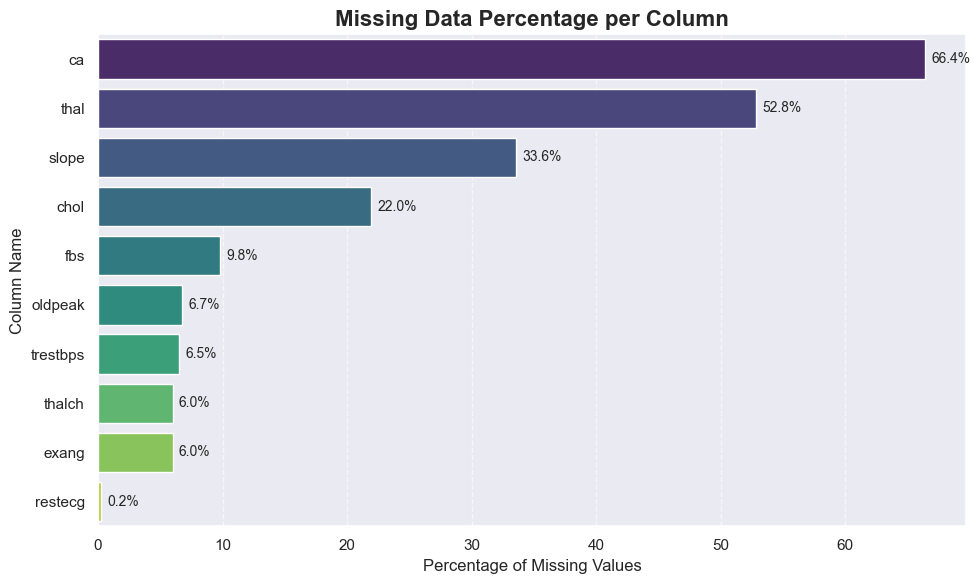

In [36]:

missing_percent = df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

# Step 2: Create a DataFrame for plotting
missing_df = missing_percent.reset_index()
missing_df.columns = ['Column', 'Missing Percentage']

# Step 3: Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Missing Percentage',
    y='Column',
    data=missing_df,
    palette='viridis'
)

# Add value labels on bars
for index, row in missing_df.iterrows():
    plt.text(row['Missing Percentage'] + 0.5, index, f"{row['Missing Percentage']:.1f}%", va='center', fontsize=10)

plt.title('Missing Data Percentage per Column', fontsize=16, weight='bold')
plt.xlabel('Percentage of Missing Values', fontsize=12)
plt.ylabel('Column Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [37]:
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

ca          66.413043
thal        52.826087
slope       33.586957
chol        21.956522
fbs          9.782609
oldpeak      6.739130
trestbps     6.521739
thalch       5.978261
exang        5.978261
restecg      0.217391
age          0.000000
sex          0.000000
cp           0.000000
num          0.000000
dtype: float64

>### Imputing Missing Values by Random Forest Imputer

In [38]:
def impute_with_random_forest(df):
    df_imputed = df.copy()
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    numerical_cols = df.select_dtypes(include=['number']).columns

    print("Starting imputation...\n")

    for col in df.columns:
        if df[col].isnull().sum() == 0:
            continue  # Skip columns with no missing values

        print(f"🔍 Imputing column: '{col}'")

        # Better categorical detection: also check low unique int values
        is_categorical = (
            col in categorical_cols or 
            (df[col].dtype in ['int64', 'int32'] and df[col].nunique() < 10)
        )

        not_null_data = df[df[col].notnull()]
        null_data = df[df[col].isnull()]

        features = df.columns.drop(col)
        X = not_null_data[features]
        y = not_null_data[col]
        X_null = null_data[features]

        if len(X) == 0 or len(X_null) == 0:
            print(f"⚠️ Skipped '{col}' due to insufficient data.")
            continue

        # Encode features
        X_all = pd.concat([X, X_null])
        X_all_encoded = pd.get_dummies(X_all, drop_first=True)
        imputer = SimpleImputer(strategy="most_frequent")
        X_all_imputed = imputer.fit_transform(X_all_encoded)
        X_all_imputed = pd.DataFrame(X_all_imputed, columns=X_all_encoded.columns, index=X_all.index)

        X_train = X_all_imputed.loc[X.index]
        X_null_imputed = X_all_imputed.loc[X_null.index]

        # Handle label encoding for categorical target
        if is_categorical:
            label_encoder = LabelEncoder()
            y_encoded = label_encoder.fit_transform(y)
            model = RandomForestClassifier(random_state=42)
        else:
            y_encoded = y
            model = RandomForestRegressor(random_state=42)

        # Train and evaluate
        X_t, X_v, y_t, y_v = train_test_split(X_train, y_encoded, test_size=0.2, random_state=42)
        model.fit(X_t, y_t)
        y_pred = model.predict(X_v)

        # Evaluate
        if is_categorical:
            acc = accuracy_score(y_v, y_pred)
            print(f"✅ Accuracy for '{col}': {acc:.2f}")
            imputed_values = label_encoder.inverse_transform(model.predict(X_null_imputed).astype(int))
        else:
            rmse = np.sqrt(mean_squared_error(y_v, y_pred))
            print(f"✅ RMSE for '{col}': {rmse:.2f}")
            imputed_values = model.predict(X_null_imputed)

        # Impute missing values
        df_imputed.loc[X_null.index, col] = imputed_values

    return df_imputed


In [39]:
df=impute_with_random_forest(df)

Starting imputation...

🔍 Imputing column: 'trestbps'
✅ RMSE for 'trestbps': 17.16
🔍 Imputing column: 'chol'
✅ RMSE for 'chol': 51.31
🔍 Imputing column: 'fbs'
✅ Accuracy for 'fbs': 0.79
🔍 Imputing column: 'restecg'
✅ Accuracy for 'restecg': 0.60
🔍 Imputing column: 'thalch'
✅ RMSE for 'thalch': 22.80
🔍 Imputing column: 'exang'
✅ Accuracy for 'exang': 0.77
🔍 Imputing column: 'oldpeak'
✅ RMSE for 'oldpeak': 0.84
🔍 Imputing column: 'slope'
✅ Accuracy for 'slope': 0.67
🔍 Imputing column: 'ca'
✅ RMSE for 'ca': 0.89
🔍 Imputing column: 'thal'
✅ Accuracy for 'thal': 0.67


In [40]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    object 
 6   restecg   920 non-null    object 
 7   thalch    920 non-null    float64
 8   exang     920 non-null    object 
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    object 
 11  ca        920 non-null    float64
 12  thal      920 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


In [41]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [42]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = le.fit_transform(df[col])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,0,0
1,67,1,0,160.0,286.0,0,0,108.0,1,1.5,1,3.0,1,2
2,67,1,0,120.0,229.0,0,0,129.0,1,2.6,1,2.0,2,1
3,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,1,0
4,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,1,0


In [43]:
df.duplicated().sum()

2

> There are 2 duplicate rows in the dataset, so we will remove them.

In [44]:
df.drop_duplicates(inplace=True)

>### Correlation Matrix:

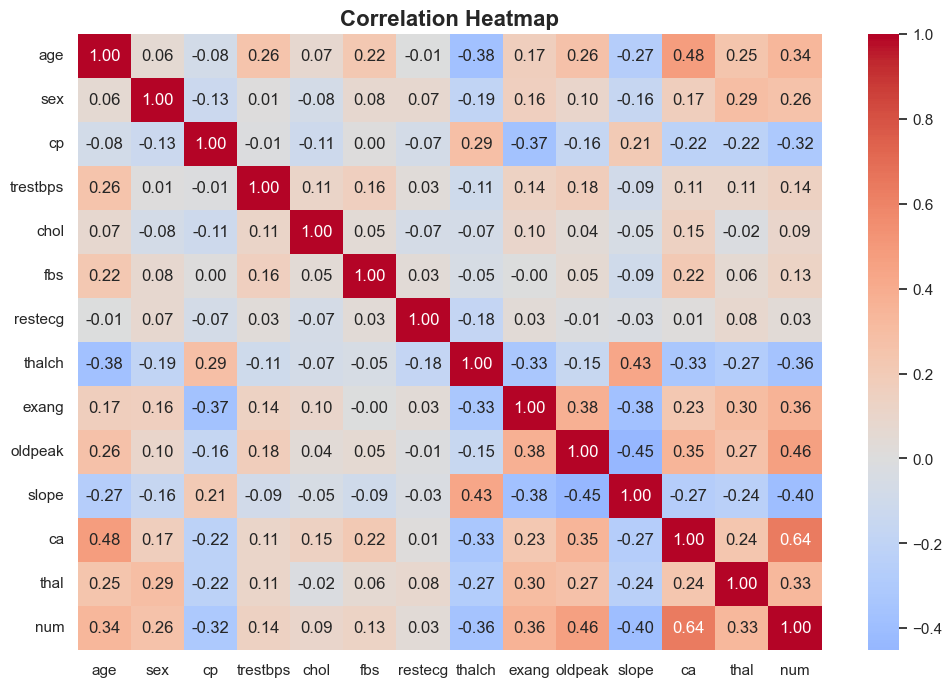

In [45]:
sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap', fontsize=16, weight='bold')
plt.show()



>#### All missing values and inconsistencies have been handled — the dataset is now prepared for building predictive models.

### Splitting the Data

In [46]:
X=df.drop(columns=['num'])
y=df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Model Building

In [47]:
# Initialize an empty DataFrame to store classification results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Function to evaluate a classification model
def evaluate_classification_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store results in a DataFrame
    model_results = pd.DataFrame({
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1]
    })

    # Append and drop duplicates if any
    global results
    results = pd.concat([results, model_results], ignore_index=True)
    results.drop_duplicates(inplace=True)


In [48]:
models = [
    (LogisticRegression(random_state=42), "Logistic Regression"),
    (RandomForestClassifier(random_state=42), "Random Forest"),
    (DecisionTreeClassifier(random_state=42), "Decision Tree"),
    (KNeighborsClassifier(), "K-Nearest Neighbors"),  # No randomness
    (SVC(probability=True, random_state=42), "Support Vector Classifier"),
    (GaussianNB(), "Naive Bayes"),  # No randomness
    (GradientBoostingClassifier(random_state=42), "Gradient Boosting"),
    (MLPClassifier(max_iter=500, random_state=42), "Neural Network"),
    (XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42), "XGBoost")
]


# Evaluate all models
for model, name in models:
    evaluate_classification_model(model, X_train, X_test, y_train, y_test, name)

# Sort and style results
results.sort_values(by='Accuracy', ascending=False).reset_index(drop=True).style \
    .background_gradient(cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)) \
    .set_caption("📊 Classification Model Evaluation Results")

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.657609,0.618325,0.657609,0.633619
1,Gradient Boosting,0.652174,0.632350,0.652174,0.641105
2,XGBoost,0.635870,0.616331,0.635870,0.622486
3,Logistic Regression,0.603261,0.576675,0.603261,0.567367
4,Decision Tree,0.565217,0.548132,0.565217,0.554885
5,Naive Bayes,0.565217,0.554014,0.565217,0.557178
6,Neural Network,0.521739,0.475452,0.521739,0.477753
7,K-Nearest Neighbors,0.451087,0.408365,0.451087,0.408853
8,Support Vector Classifier,0.402174,0.274301,0.402174,0.270000


> Ranndom Forest Classifier give the best accuracy of 65.8% on the test data. So we will use this model for prediction.

In [49]:
model=RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# 7. Model Evaluation

Accuracy: 0.657608695652174
Precision: 0.6183251034274052
Recall: 0.657608695652174
F1 Score: 0.6336193091481686


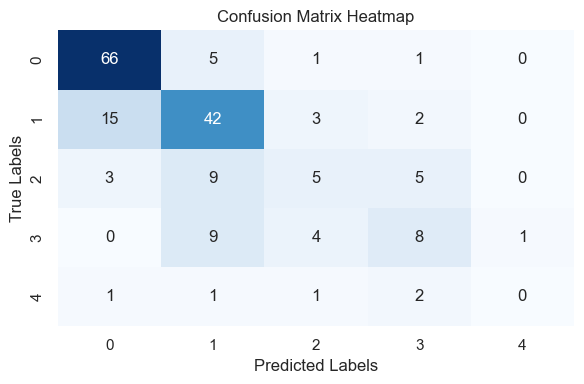

In [50]:
y_pred=model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

# Add labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()


# 8. Hyperparameter Tuning

In [51]:
# Define the parameter grid
from sklearn.metrics import classification_report
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(10, 200, num=20)],
    'max_depth': [None] + [int(x) for x in np.linspace(5, 50, num=10)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=10,             # Number of different combinations to try
    cv=5,                  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1              # Use all cores
)

# Fit the search model
random_search.fit(X_train, y_train)

# Best parameters and estimator
print("Best Parameters:", random_search.best_params_)
print("Best Estimator:", random_search.best_estimator_)

# Evaluate on test set
y_pred = random_search.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 35, 'bootstrap': True}
Best Estimator: RandomForestClassifier(max_depth=35, min_samples_split=5, n_estimators=150,
                       random_state=42)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83        73
           1       0.64      0.73      0.68        62
           2       0.29      0.18      0.22        22
           3       0.42      0.36      0.39        22
           4       0.00      0.00      0.00         5

    accuracy                           0.66       184
   macro avg       0.43      0.43      0.43       184
weighted avg       0.61      0.66      0.63       184



>### Make the Final Model

In [52]:
model = RandomForestClassifier(max_depth=35, min_samples_split=5, n_estimators=150,
                       random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=35, min_samples_split=5, n_estimators=150,
                       random_state=42)

In [53]:
y_pred=model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classfication Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.657608695652174
Classfication Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83        73
           1       0.64      0.73      0.68        62
           2       0.29      0.18      0.22        22
           3       0.42      0.36      0.39        22
           4       0.00      0.00      0.00         5

    accuracy                           0.66       184
   macro avg       0.43      0.43      0.43       184
weighted avg       0.61      0.66      0.63       184



# 9. Feature Importance Analysis

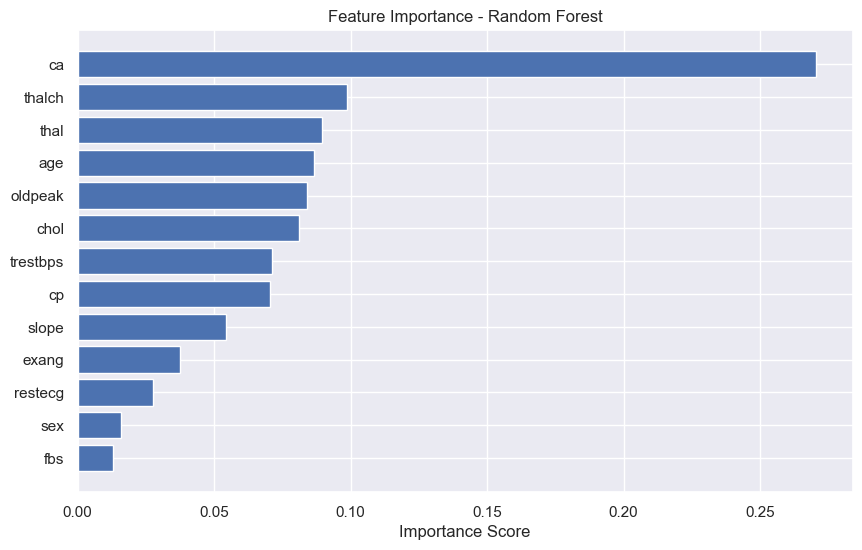

In [55]:
# Assume rf_model is your trained Random Forest model
feature_names = X_train.columns  # your feature names
importances = model.feature_importances_

# Create a DataFrame for plotting
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.gca().invert_yaxis()  # highest importance on top
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.show()


# 10. Conclusion


In this project, we developed a heart disease prediction system using the UCI Heart Disease dataset. Multiple classification algorithms were implemented and evaluated based on their performance metrics such as Accuracy, Precision, Recall, and F1 Score.

After extensive experimentation and hyperparameter tuning, the **Random Forest Classifier** emerged as the best-performing model with an accuracy of approximately **65.76%**. It achieved the highest overall balance between precision and recall, particularly excelling in distinguishing between non-disease (class 0) and moderate-risk categories (class 1). However, it showed limited performance in predicting higher severity classes (2, 3, and 4), indicating potential challenges due to class imbalance or feature overlap.

---
### 🔍 Model Comparison Summary

| Model                    | Accuracy | Precision | Recall | F1 Score |
|-------------------------|----------|-----------|--------|----------|
| ✅ Random Forest         | 0.6576   | 0.6183    | 0.6576 | 0.6336   |
| Gradient Boosting       | 0.6522   | 0.6324    | 0.6522 | 0.6411   |
| XGBoost                 | 0.6359   | 0.6163    | 0.6359 | 0.6225   |
| Logistic Regression     | 0.6033   | 0.5767    | 0.6033 | 0.5674   |
| Decision Tree           | 0.5652   | 0.5481    | 0.5652 | 0.5549   |
| Naive Bayes             | 0.5652   | 0.5540    | 0.5652 | 0.5572   |
| Neural Network (MLP)    | 0.5217   | 0.4755    | 0.5217 | 0.4778   |
| K-Nearest Neighbors     | 0.4511   | 0.4084    | 0.4511 | 0.4089   |
| Support Vector Classifier | 0.4022 | 0.2743    | 0.4022 | 0.2700   |

### 📈 Key Insights
- **Random Forest**, after hyperparameter tuning, offered the best generalization performance.
- **Gradient Boosting** and **XGBoost** also performed competitively and may benefit from further tuning or ensembling.
- **Support Vector Classifier** and **KNN** performed poorly, suggesting they are less suited for this dataset in its current form.
- The model performance drops significantly for minority classes (e.g., class 4), indicating a **class imbalance** problem which could be addressed using resampling techniques like **SMOTE** or **class weighting** in future work.
---

This project highlights the challenges of multi-class classification in medical datasets and provides a solid foundation for future enhancements in predictive modeling for heart disease risk assessment.
